In [2]:
from pyplotdesigner.core.design import Design
from pyplotdesigner.core.models import SetValueConstraint
from pyplotdesigner.core.design_loader import make_figure_from_design
from pyplotdesigner.core.design_loader import make_figure_from_b64
import matplotlib.pyplot as plt
import h5py
import numpy as np
import os
import imageio.v2 as imageio

## Data importation 

In [3]:
#Abres el documento que ya se encuentra en el repositorio
inoisyfile = h5py.File("inoisy.h5", 'r')
i_fname="inoisy.h5"
print(f'el archivo inoisy.h5 contiene los siguientes directorios: \n', list(inoisyfile.keys()))

# Lecuture of inoisy
data = np.array(inoisyfile['data/data_env'])
data = data[:256]
data_lc = np.array(inoisyfile['data/lightcurve_env'])
dataclean_lc = np.array(inoisyfile['data/lightcurve_raw']) 

#Limits of the figure
xystart = np.array(inoisyfile['params/x1start'])[0]

print("There are %s snapshots in this inoisy data set"%data.shape[0])
inoisyfile.close()

el archivo inoisy.h5 contiene los siguientes directorios: 
 ['data', 'params']
There are 256 snapshots in this inoisy data set


In [5]:
fimages="Images_a_0.94_i_17_inoisy.h5"

print("Reading file: ",fimages)

h5f = h5py.File(fimages,'r')

Is0=h5f['bghts0'][:]
Is1=h5f['bghts1'][:]
Is2=h5f['bghts2'][:]
h5f.close()

Reading file:  Images_a_0.94_i_17_inoisy.h5


In [6]:
fimages="FastLight_Images_a_0.94_i_17_inoisy.h5"

print("Reading file: ",fimages)

h5f = h5py.File(fimages,'r')

I0=h5f['bghts0'][:]
I1=h5f['bghts1'][:]
I2=h5f['bghts2'][:]

print(f'el archivo {fimages} contiene los siguientes directorios: \n', list(h5f.keys()))

h5f.close() 

Reading file:  FastLight_Images_a_0.94_i_17_inoisy.h5
el archivo FastLight_Images_a_0.94_i_17_inoisy.h5 contiene los siguientes directorios: 
 ['bghts0', 'bghts1', 'bghts2']


## Light curve creation 

In [4]:
snapshots = 256
i_tM,f_tM = 0 , 1000
lim0 = 10

In [8]:
Light_curve_aart = np.zeros(snapshots)
Itotal = Is0 + Is1 + Is2
for tsnap in range(snapshots):
    Light_curve_aart[tsnap] = np.sum(Is0[tsnap,:,:]) + np.sum(Is1[tsnap,:,:]) + np.sum(Is2[tsnap,:,:])
Max_Light_aart_curve = np.max(Light_curve_aart)

Light_NormalCurve_aart = Light_curve_aart/(Max_Light_aart_curve +0.2*Max_Light_aart_curve)

T_LightCurve_arrt = np.linspace(i_tM,f_tM,snapshots)

In [9]:
Light_curve = np.zeros(256)
for tsnap in range(256):
    Light_curve[tsnap] = np.sum(data[tsnap])

Light_MCurve = Light_curve/np.max(Light_curve)

In [10]:
Light_curve_fast = np.zeros(snapshots)
for tsnap in range(snapshots):
    Light_curve_fast[tsnap] = np.sum(I0[tsnap,:,:]) + np.sum(I1[tsnap,:,:]) + np.sum(I2[tsnap,:,:])
    
Max_Light_fast_curve = np.nanmax(Light_curve_fast)

Light_NormalCurve_fast = Light_curve_fast/(Max_Light_fast_curve +0.2*Max_Light_fast_curve)


In [11]:
FracDif = (Light_NormalCurve_aart-Light_NormalCurve_fast)/Light_NormalCurve_aart

## Picture generation

In [12]:
design = Design()
design.set_viewport(figure_width=11, figure_height=9)

# Plots
plot1 = design.add_element(id='plot1', type='axis')  # bottom
plot2 = design.add_element(id='plot2', type='axis')  # middle
plot3 = design.add_element(id='plot3', type='axis')  # top-left
plot4 = design.add_element(id='plot4', type='axis')  # top-center
plot5 = design.add_element(id='plot5', type='axis')  # top-right

# Constants
h_spacing = design.add_constant(id='h_spacing', value=0.8)
v_spacing = design.add_constant(id='v_spacing', value=0.5)
square_ratio = design.add_constant(id='square_ratio', value=10.0)

# plot1 (bottom) config
design.add_constraint(plot1.x, 0.7)
design.add_constraint(plot1.y, 0.5)
design.add_constraint(plot1.width, square_ratio.value)
design.add_constraint(plot1.height, 1)

# plot2 (middle)
design.add_constraint(plot2.x, 0.7)
design.add_constraint(plot2.width, square_ratio.value)
design.add_constraint(plot2.y, plot1.top, add_after=v_spacing.value)
design.add_constraint(plot2.height, 3)

# Top row: plot3, plot4, plot5
# width of each square = (10 - 2*h_spacing) / 3
design.add_constraint(plot3.width, (10 - 2 * 0.8) / 3) ##########
design.add_constraint(plot3.height, plot3.width)  # square
design.add_constraint(plot3.x, 0.7)
design.add_constraint(plot3.y, plot2.top, add_after=v_spacing.value)

design.add_constraint(plot4.width, plot3.width)
design.add_constraint(plot4.height, plot3.height)
design.add_constraint(plot4.x, plot3.right, add_after=h_spacing.value)
design.add_constraint(plot4.y, plot3.y)

design.add_constraint(plot5.width, plot3.width)
design.add_constraint(plot5.height, plot3.height)
design.add_constraint(plot5.x, plot4.right, add_after=h_spacing.value)
design.add_constraint(plot5.y, plot3.y)

design.solve()
#string = design.get_b64_string()

In [128]:
fig, axes = make_figure_from_design(design)

x_diff = axes['plot1']
ax_lc = axes['plot2']
ax_top_left = axes['plot3']
ax_top_center = axes['plot4']
ax_top_right = axes['plot5']

#Top left
ax_top_left.imshow(np.log(data[55,:,:]),cmap="plasma",origin="lower",extent=[-xystart,xystart,-xystart,xystart])

ax_top_left.set_facecolor('xkcd:black')
ax_top_left.set_xlabel(r"$X$"+" "+"(M)")
ax_top_left.set_ylabel(r"$Y$"+" "+"(M)")
ax_top_left.set_title(r"Inoisy Movie")

#Top center
VMAX=np.max(Is0+Is1+Is2)
ax_top_center.imshow(Is0[55,:,:]+Is1[55,:,:]+Is2[55,:,:],vmax=VMAX,origin="lower",cmap="plasma",extent=[-lim0,lim0,-lim0,lim0])

ax_top_center.set_facecolor('xkcd:black')
ax_top_center.set_xlabel(r"$X$"+" "+"(M)")
ax_top_center.set_ylabel(r"$Y$"+" "+"(M)")
ax_top_center.set_title(r"Slow-Light Movie")

#Top right
VMax=np.max(I0+I1+I2)
ax_top_right.imshow(I0[55,:,:]+I1[55,:,:]+I2[55,:,:],vmax=VMax,origin="lower",cmap="plasma",extent=[-lim0,lim0,-lim0,lim0])

ax_top_right.set_facecolor('xkcd:black')
ax_top_right.set_xlabel(r"$X$"+" "+"(M)")
ax_top_right.set_ylabel(r"$Y$"+" "+"(M)")
ax_top_right.set_title(r"Fast-Light Movie")

#Center 
ax_lc.plot(T_LightCurve_arrt[:55], Light_NormalCurve_fast[:55],label='Inoisy + aart in fast-light', color='darkblue')
ax_lc.plot(T_LightCurve_arrt[:55], Light_NormalCurve_aart[:55],label='Inoisy + aart in slow-light', color='darkgreen')
ax_lc.plot(T_LightCurve_arrt[:55], Light_MCurve[:55],linestyle="--", label='Inoisy', color='darkred')
ax_lc.set_xlabel(r"$T$")
ax_lc.set_ylabel(r"Normalized Light Curve")
ax_lc.legend()

# Frac Difference
x_diff.plot(T_LightCurve_arrt[:55], FracDif[:55], color='darkred')
x_diff.set_xlabel(r"$T$")
x_diff.set_ylabel(r"Fractional Difference")


C:\Users\danyp\AppData\Local\Temp\ipykernel_33392\1402314514.py:8: RuntimeWarning: divide by zero encountered in log
  ax_top_left.imshow(np.log(data[55,:,:]),cmap="plasma",origin="lower",extent=[-xystart,xystart,-xystart,xystart])


Text(4.4444444444444375, 0.5, 'Fractional Difference')

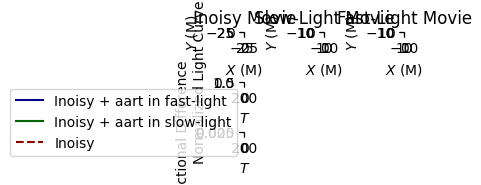

In [129]:
fig

### Movie Production

In [6]:
fignames=[]
for tsnap in np.arange(snapshots):
    #fig, axes = make_figure_from_design(design)
#
    #x_diff = axes['plot1']
    #ax_lc = axes['plot2']
    #ax_top_left = axes['plot3']
    #ax_top_center = axes['plot4']
    #ax_top_right = axes['plot5']
    #
    ##Top left
    #ax_top_left.imshow(np.log(data[tsnap,:,:]),cmap="plasma",origin="lower",extent=[-xystart,xystart,-xystart,xystart])
    #
    #ax_top_left.set_facecolor('xkcd:black')
    #ax_top_left.set_xlabel(r"$X$"+" "+"(M)")
    #ax_top_left.set_ylabel(r"$Y$"+" "+"(M)")
    #ax_top_left.set_title(r"Inoisy Movie")
    #
    ##Top center
    #VMAX=np.max(Is0+Is1+Is2)
    #ax_top_center.imshow(Is0[tsnap,:,:]+Is1[tsnap,:,:]+Is2[tsnap,:,:],vmax=VMAX,origin="lower",cmap="plasma",extent=[-lim0,lim0,-lim0,lim0])
#
    #ax_top_center.set_facecolor('xkcd:black')
    #ax_top_center.set_xlabel(r"$X$"+" "+"(M)")
    #ax_top_center.set_ylabel(r"$Y$"+" "+"(M)")
    #ax_top_center.set_title(r"Slow-Light Movie")
    #
    ##Top right
    #VMax=np.max(I0+I1+I2)
    #ax_top_right.imshow(I0[tsnap,:,:]+I1[tsnap,:,:]+I2[tsnap,:,:],vmax=VMax,origin="lower",cmap="plasma",extent=[-lim0,lim0,-lim0,lim0])
    
    #ax_top_right.set_facecolor('xkcd:black')
    #ax_top_right.set_xlabel(r"$X$"+" "+"(M)")
    #ax_top_right.set_ylabel(r"$Y$"+" "+"(M)")
    #ax_top_right.set_title(r"Fast-Light Movie")
    #
    ##Center 
    #ax_lc.plot(T_LightCurve_arrt[:tsnap], Light_NormalCurve_fast[:tsnap],label='Inoisy + aart in fast-light', color='darkblue')
    #ax_lc.plot(T_LightCurve_arrt[:tsnap], Light_NormalCurve_aart[:tsnap],label='Inoisy + aart in slow-light', color='darkgreen')
    #ax_lc.plot(T_LightCurve_arrt[:tsnap], Light_MCurve[:tsnap],linestyle="--", label='Inoisy', color='darkred')
    #ax_lc.set_xlabel(r"$T$")
    #ax_lc.set_ylabel(r"Normalized Light Curve")
    #ax_lc.legend()
    #
    ## Frac Difference
    #x_diff.plot(T_LightCurve_arrt[:tsnap], FracDif[:tsnap], color='darkred')
    #x_diff.set_xlabel(r"$T$")
    #x_diff.set_ylabel(r"Fractional Difference")

    fignames.append('./Results/Fig%s.png'%tsnap)
    #fig.savefig('./Results/Fig%s.png'%tsnap,dpi=400,bbox_inches='tight')
    #plt.close(fig)

with imageio.get_writer('./Results/BHMovie_information.gif', mode='I') as writer:
    for filename in fignames:
        image = imageio.imread(filename)
        writer.append_data(image)

# We delete the created images and just keep the GIF
for filename in set(fignames):
    os.remove(filename)

In [3]:
type(6)

int